In [3]:
import pandas as pd

In [5]:
import nltk    
from nltk import tokenize
from nltk.corpus import stopwords

In [6]:
import string

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
import numpy as np

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
import tensorflow as tf

In [71]:
from tensorflow.keras.models import Sequential

In [73]:
from tensorflow.keras.layers import Input, Dense, CategoryEncoding, IntegerLookup, StringLookup

In [119]:
import matplotlib.pyplot as plt

In [199]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [13]:
nltk.download('stopwords')
nltk.download('punkt') # Download for word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")

In [15]:
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [16]:
df["Type"].unique()

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

In [17]:
news_df = df[["Description", "Type"]]
news_df.head()

,Description,Type
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",Business
1,"Harare, Zimbabwe – Local businesses are grappl...",Business
2,(marketscreener.com) Billionaire Elon Musk has...,Business
3,(marketscreener.com) A U.S. trade regulator on...,Business
4,4.5 million households in the U.S. have solar ...,Business


In [18]:
def limpar_texto( texto ):
    translator = str.maketrans('–,.!-?()<>[]—', '             ', string.punctuation)
    texto_limpo = texto.translate(translator)
    # return texto_limpo.split(" ")
    return tokenize.word_tokenize(texto_limpo.lower(), language='english')

In [19]:
def limpar_stop_words( tokens ):
    # Remover StopWords
    tokens_limpos = []
    for token in tokens:
        if token not in stop_words: 
            tokens_limpos.append( token )
    return tokens_limpos

In [27]:
def pre_processamento( texto ):
    tokens = limpar_texto( texto )
    tokens_limpos = limpar_stop_words( tokens )
    return " ".join(tokens_limpos)

In [29]:
# def pre_processamento( texto ):
#     translator = str.maketrans('–,.!-?()<>[]', '            ', string.punctuation)
#     texto_limpo = texto.translate(translator)
#     # return texto_limpo.split(" ")
#     tokens = tokenize.word_tokenize(texto_limpo, language='english')    
#     tokens_limpos = []
#     for token in palavras_tokenize:
#         if token not in stop_words: 
#             tokens_limpos.append( token )
#     return tokens_limpos

In [34]:
# Download stopwords if not already downloaded
# texto = news_df["Description"][1].lower()
# pre_processamento( texto )

In [38]:
news_df["Tokens"] = news_df["Description"].apply( pre_processamento )
news_df.head()

C:\Users\anton\AppData\Local\Temp\ipykernel_19776\1548482293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df["Tokens"] = news_df["Description"].apply( pre_processamento )


,Description,Type,Tokens
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",Business,st george kaitlyn larson firstyear teacher pin...
1,"Harare, Zimbabwe – Local businesses are grappl...",Business,harare zimbabwe local businesses grappling sev...
2,(marketscreener.com) Billionaire Elon Musk has...,Business,marketscreenercom billionaire elon musk donate...
3,(marketscreener.com) A U.S. trade regulator on...,Business,marketscreenercom us trade regulator fridayann...
4,4.5 million households in the U.S. have solar ...,Business,45 million households us solar panels homes cu...


In [67]:
MAX_PALAVRAS = 1000

In [41]:
vetorizador = CountVectorizer(max_features=MAX_PALAVRAS, binary=True, lowercase=True)

In [43]:
bow = vetorizador.fit_transform( news_df["Tokens"] )

In [44]:
vocabulario = vetorizador.get_feature_names_out()

In [45]:
all_X = pd.DataFrame.sparse.from_spmatrix( bow, columns=vocabulario ).astype(np.float32)

In [46]:
all_X

,07,10,100,11,12,13,13f,14,141st,15,...,wray,writer,year,yearly,years,yet,york,young,zu,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
input_data = news_df["Type"].values
lookup_layer = StringLookup(output_mode='int')
lookup_layer.adapt(input_data)
vocab_size = lookup_layer.vocabulary_size() 
encoder_layer = CategoryEncoding(num_tokens=vocab_size, output_mode='one_hot')

integer_data = lookup_layer(input_data)
one_hot_encoded_data = encoder_layer(integer_data)

all_Y = one_hot_encoded_data.numpy()

In [201]:
vocabulario_saida = lookup_layer.get_vocabulary()

In [99]:
news_df["Type"].unique()

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

In [101]:
one_hot_encoded_data

<tf.Tensor: shape=(3500, 8), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(all_X, all_Y, test_size=0.3, random_state=50)

In [105]:
modelo = Sequential()
modelo.add( Input( (MAX_PALAVRAS, ) ) )
modelo.add( Dense( 128, activation="relu" ) )
modelo.add( Dense( 32, activation="relu" ) )
modelo.add( Dense( 8, activation="softmax" ) )
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,520 (517.66 KB)

 Trainable params: 132,520 (517.66 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
modelo.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) 

In [133]:
historico = modelo.fit( X_train, Y_train, epochs=20, batch_size=32 )

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9769 - loss: 0.0674
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9691 - loss: 0.0650
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9756 - loss: 0.0540
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9690 - loss: 0.0649
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.0584
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9659 - loss: 0.0624
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9739 - loss: 0.0537
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9698 - loss: 0.0620
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9716 - loss: 0.0570
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9624 - loss: 0.0632
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9719 - loss: 0.0555
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9699 - lo

In [115]:
historico.history

{'accuracy': [0.9669387936592102,
  0.9689795970916748,
  0.9640816450119019,
  0.9661224484443665,
  0.9685714244842529,
  0.9665306210517883,
  0.9657142758369446,
  0.9653061032295227,
  0.9653061032295227,
  0.9648979306221008,
  0.9677550792694092,
  0.9673469662666321,
  0.9661224484443665,
  0.968163251876831,
  0.9665306210517883,
  0.9648979306221008,
  0.9657142758369446,
  0.968163251876831,
  0.9669387936592102,
  0.968163251876831],
 'loss': [0.08381563425064087,
  0.07953587919473648,
  0.08663755655288696,
  0.08451519161462784,
  0.0799700990319252,
  0.08108913898468018,
  0.07894505560398102,
  0.08047711104154587,
  0.07722622901201248,
  0.08197823911905289,
  0.07490607351064682,
  0.080638088285923,
  0.07381822168827057,
  0.07729468494653702,
  0.07442634552717209,
  0.0801548957824707,
  0.07594364881515503,
  0.07389523833990097,
  0.07310006022453308,
  0.07275350391864777]}

In [139]:
acuracia = np.array(historico.history["accuracy"])
acuracia_norm = acuracia / np.max( acuracia )
perda = np.array(historico.history["loss"])
perda_norm = perda / np.max( perda )

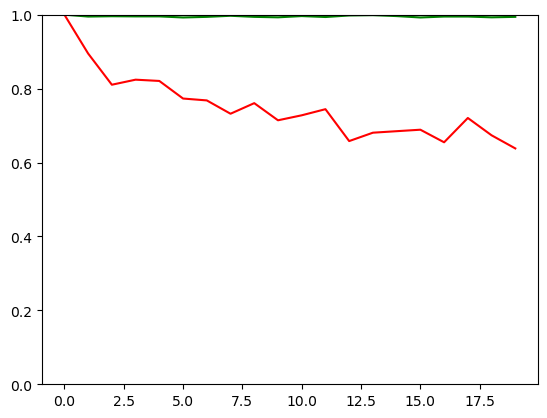

In [145]:
plt.plot(acuracia_norm, color="green")
plt.plot(perda_norm, color="red")
plt.ylim(0, 1)
plt.show()

In [147]:
modelo.evaluate( X_test, Y_test )

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8443 - loss: 0.7673


[0.764691174030304, 0.8419047594070435]

In [ ]:
                Technology     Sports    Science    Health    General     Entertainment     Business
Technology           88           1         3          2         2           1                 3
Sports
Science
Health
General
Entertainment
Business
'',
 '',
 '',
 '',
 '',
 '',
 ''

In [149]:
y_pred = modelo.predict( X_test )

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [159]:
Y_test.shape

(1050, 8)

In [163]:
np.argmax(Y_test, 1)

array([3, 1, 4, ..., 6, 1, 5], dtype=int64)

In [155]:
y_pred.shape

(1050, 8)

In [183]:
conf_matrix = tf.math.confusion_matrix(labels=np.argmax(Y_test, 1), predictions=np.argmax(y_pred, 1))

In [197]:
cm = confusion_matrix(np.argmax(Y_test, 1), np.argmax(y_pred, 1))
cm

array([[126,   2,  16,   3,   3,   4,  13],
       [  0, 132,   3,   0,   3,   4,   2],
       [  6,   0, 122,   3,   1,   0,   5],
       [  1,   3,   2, 127,   0,   0,   9],
       [  2,   7,   1,   2, 130,   2,  11],
       [  2,   9,   1,   5,   1, 113,  10],
       [  6,   8,   1,   6,   4,   5, 134]], dtype=int64)

In [ ]:
                Technology     Sports    Science    Health    General     Entertainment     Business
Technology           126,        2,         16,       3,         3,            4,              13
Sports                0,        132,         3,       0,         3,            4,               2
Science               6,         0,        122,       3,         1,            0,               5 
Health                1,         3,   2, 127,   0,   0,   9
General               2,         7,   1,   2, 130,   2,  11 
Entertainment         2,   9,   1,   5,   1, 113,  10       
Business              6,   8,   1,   6,   4,   5, 134  

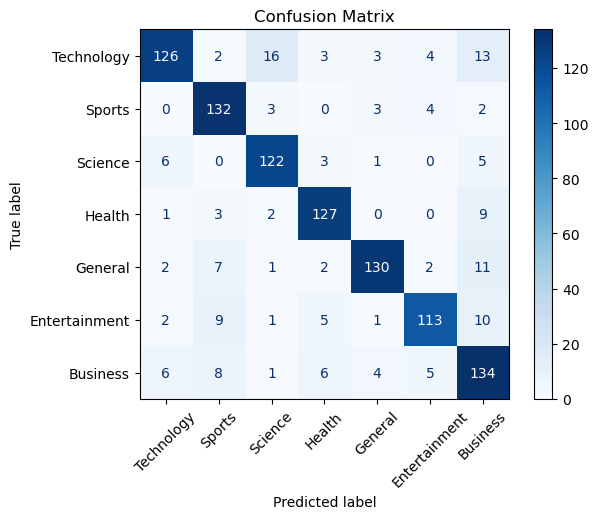

In [211]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vocabulario_saida[1:])
disp.plot(cmap=plt.cm.Blues) # You can choose other colormaps
plt.title("Confusion Matrix")
tick_marks = np.arange(len(vocabulario_saida[1:]))
plt.xticks(tick_marks, vocabulario_saida[1:], rotation=45)
plt.yticks(tick_marks, vocabulario_saida[1:])
plt.show()